In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os
path = '/Users/vivienne/Desktop/九章算法'
os.chdir(path)
train = pd.read_csv('./creditcard_train.csv')
train.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
train.describe()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,...,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000
mean,142485.953049,94864.232641,0.003432,0.000944,-0.000120,-0.000068,0.000143,-0.001337,0.000367,-0.000810,...,-0.000996,0.000211,0.000768,-0.000303,0.000415,0.000354,-0.000274,0.000256,87.968090,0.001734
std,82226.825346,47494.839872,1.951633,1.644484,1.509267,1.415671,1.382926,1.332437,1.240397,1.182995,...,0.731466,0.724361,0.615871,0.605033,0.520877,0.482573,0.402413,0.322572,250.749915,0.041606
min,0.000000,0.000000,-41.928738,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-50.943369,...,-22.797604,-10.933144,-36.666000,-2.836627,-7.495741,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,71286.000000,54240.000000,-0.919351,-0.598515,-0.890830,-0.849439,-0.691556,-0.768981,-0.554361,-0.209116,...,-0.228227,-0.541399,-0.161482,-0.354815,-0.317194,-0.327033,-0.070966,-0.052882,5.510000,0.000000
50%,142512.000000,84765.000000,0.021299,0.065609,0.179125,-0.020344,-0.055427,-0.275720,0.040358,0.022335,...,-0.029672,0.006675,-0.011212,0.040610,0.017127,-0.052128,0.001320,0.011294,21.990000,0.000000
75%,213657.000000,139341.000000,1.316593,0.805156,1.026138,0.742383,0.610164,0.397139,0.570242,0.327959,...,0.185470,0.527543,0.147993,0.438805,0.350827,0.241380,0.090764,0.077988,77.000000,0.000000
max,284806.000000,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,20.007208,...,27.202839,8.361985,22.528412,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000,1.000000


In [13]:
print(train.groupby(['Class']).size())

Class
0    227394
1       395
dtype: int64


In [16]:
Fraud_transaction = train[train['Class']==1]
Normal_transaction = train[train['Class']==0]

In [17]:
print('percentage of fraud transaction is', len(Fraud_transaction)/len(train))
print('percentage of normal transaction is', len(Normal_transaction)/len(train))

percentage of fraud transaction is 0.0017340609072431065
percentage of normal transaction is 0.9982659390927568


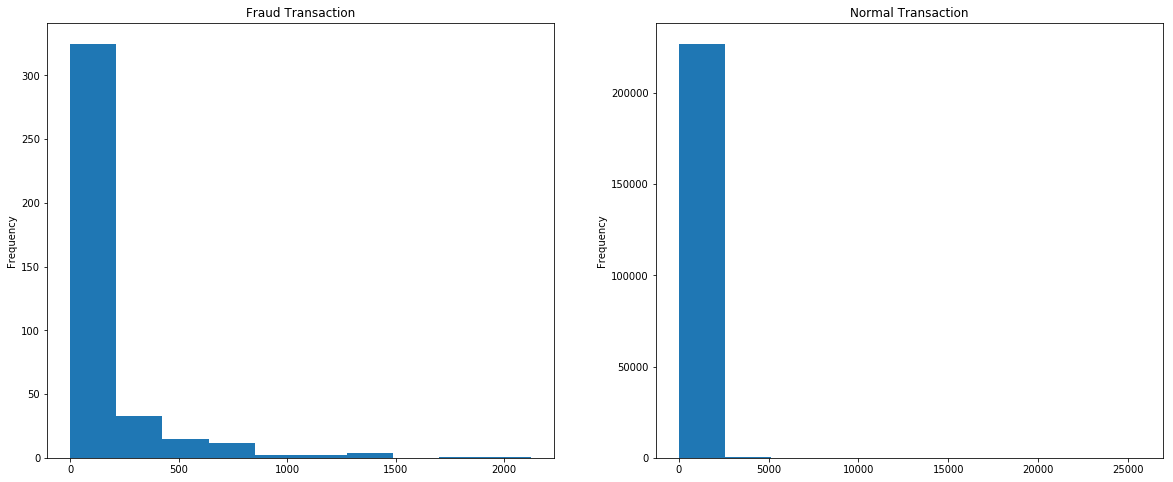

In [21]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
Fraud_transaction.Amount.plot.hist(title='Fraud Transaction')
plt.subplot(122)
Normal_transaction.Amount.plot.hist(title='Normal Transaction')

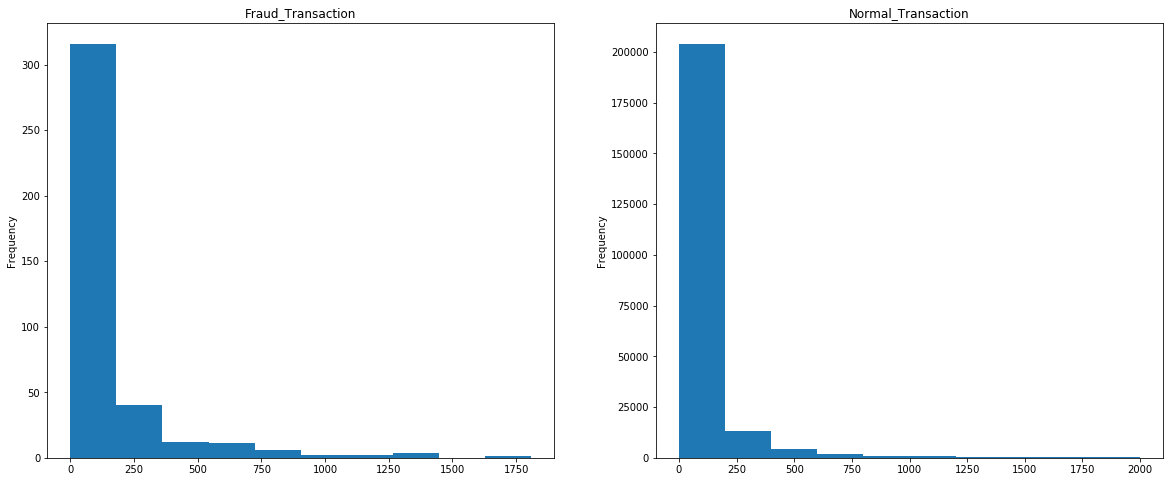

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(121)
Fraud_transaction[Fraud_transaction['Amount']<=2000].Amount.plot.hist(title='Fraud_Transaction')
plt.subplot(122)
Normal_transaction[Normal_transaction['Amount']<=2000].Amount.plot.hist(title='Normal_Transaction')

In [28]:
from sklearn.preprocessing import StandardScaler

train['Amount'] = StandardScaler().fit_transform(train['Amount'].values.reshape(-1,1))
train['Time'] = StandardScaler().fit_transform(train['Time'].values.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
from